## Principal Component Analysis (PCA)
___

1. [Introduction](#1.-Introduction) <br><br>
2. [Synthetic data creation](#2.-Synthetic-data-creation) <br>
    2.1 [Generate data](#2.1.-Generate-data) <br>
    2.2 [Compute the data's mean and covariance matrix](#2.2-Compute-the-data's-mean-and-covariance-matrix) <br><br>

3. [Synthetic data creation](#2.-Synthetic-data-creation)<br>
    3.1. [Variance maximization formulation](#3.-Variance-maximization-formulation)<br>
    3.2. [Defining function to be optimized](#3.1-Defining-function-to-be-optimized)<br>
    3.3. [Plotting the data, along with its principal components](#3.3-Plotting-the-data,-along-with-its-principal-components)<br>
    3.4. [Project the data onto the first principal component](#3.4-Project-the-data-onto-u1,-compute-the-variance-and-plot) <br>
    3.5. [[Extra] Plot the variance against different vector directions](3.4-[Extra]-Plot-the-variance-against-different--vector-directions)<br><br>
    
4. [References](#4.-References)<br>
___

### 1. Introduction

The theory and implementations explored here are based on the 12th chapter of [1]. 

PCA, also known as the *Karhunen-Loève* trasnform, is a technique widely used for applications such as:
- Dimensionality reduction
- Lossy data compression
- Feature extraction
- Data visualization


There are **2** commonly used equivalent definitions of PCA that give rise to the same algorithm:

1. The orthogonal projection of the data onto a lower dimensional linear space (the principal subspace), **maximizing the variance** of the projected data.

2. The linear projection that **minimizes the average projection error**, i.e. the mean squared distance between the data points and their projections. 

Both definitions will be considered, but let's create some synthetic data first! 
___

### 2. Synthetic data creation

Consider a data set of observations $\{\texttt{x}_n\}$ where $n = 1, . . . , N$, and $x_n$ is a
Euclidean variable with dimensionality D. We want to project the data onto a
subspace with dimensionality M < D, maximizing the variance of the projected
data.

In our example, let's have a data set of $n$ 2D random points ($D = 2$) which we want to project onto an 1D-subspace ($M = 1$).

#### 2.1. Generate data

In [4]:
import numpy as np
import matplotlib.pyplot as plt

n = 200                 # Number of points
mean = [4,3]            # Mean
cov  = [[0.40, 0.45],   # Covariance matrix
        [0.45, 0.80]]
data = np.random.multivariate_normal(mean,cov, 200).T
data

array([[ 4.34147459,  4.743925  ,  3.28333618,  4.30306135,  3.88682071,
         4.47302301,  3.943546  ,  4.1452603 ,  4.82739317,  4.74027002,
         3.6611522 ,  3.66465613,  4.99005208,  3.77257113,  4.65334856,
         3.57266381,  4.20216181,  3.56732757,  3.91215478,  4.51251646,
         3.63486765,  3.73549451,  3.70491885,  3.8104105 ,  5.1704311 ,
         3.77870405,  4.55826414,  3.44541208,  3.58816084,  3.59828818,
         4.17437777,  3.21362205,  4.01856737,  3.97342457,  3.32833606,
         3.76759714,  3.85139794,  3.58101485,  4.31697438,  3.35495985,
         4.27849474,  3.07514872,  3.41983911,  4.19618389,  3.20624231,
         3.85378832,  4.13129398,  3.234851  ,  3.07264756,  3.46887748,
         5.34179679,  3.67438236,  2.85024596,  2.80605545,  4.59670528,
         3.95948018,  4.07882031,  3.31053273,  4.23066624,  4.47090578,
         3.46220402,  3.19909003,  4.81029911,  3.25076342,  3.24289004,
         4.07855896,  3.67647687,  3.75693924,  3.8

Let's take a look at the data

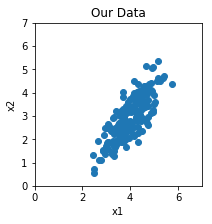

In [61]:
fig = plt.figure(figsize=(3,3))
plt.scatter(data[0,:], data[1,:])
plt.xlim(0,7), plt.ylim(0,7)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Our Data')
plt.show()

#### 2.2 Compute the data's mean and covariance matrix

Given the data $\{\texttt{x}_n\}$, its mean $\overline{\texttt{x}}$ and covariance matrix $\textbf{S}$ are computed according to:
$$\overline{\texttt{x}} = \frac{1}{N}\sum_{n=1}^N \texttt{x}_n, 
\hspace{1cm} \textbf{S} = \frac{1}{N}\sum_{n=1}^N (\texttt{x}_n - \overline{\texttt{x}})(\texttt{x}_n - \overline{\texttt{x}})^\texttt{T}  $$

In [62]:
#Data mean
data_mean = np.mean(data, axis=1).reshape(-1,1)

#Data covariance matrix (you can use np.cov(data))
S = []
for point in data.T:
    diff = point - data_mean.T
    S.append(np.dot(diff.T,diff))
S = np.mean(S, axis=0)

print("Data mean (centroid):\n", data_mean)
print("Data covariance matrix:\n",S)

print("\nCompare to the ones used for generating the data:")
print("Chosen mean:\n", mean)
print("Chosen covariance matrix:\n", np.matrix(cov))

Data mean (centroid):
 [[ 3.98391764]
 [ 2.94926657]]
Data covariance matrix:
 [[ 0.3902082   0.44695333]
 [ 0.44695333  0.81316192]]

Compare to the ones used for generating the data:
Chosen mean:
 [4, 3]
Chosen covariance matrix:
 [[ 0.4   0.45]
 [ 0.45  0.8 ]]


___
### 3. Maximum variance formulation

**Goal**: Find the principal direction (vector $\textbf{u}_1$) onto which the variance of the projected data is maximized.

We're only interested in the direction $\textbf{u}_1$, so we can choose it to be an unit vector ($\textbf{u}_1^\texttt{T}\textbf{u}_1 = 1$) without loss of generality. 

Then, each data point $\texttt{x}_n$ is projected onto a esclar given by $\textbf{u}_1^\texttt{T}\texttt{x}_n$. In the end, the mean of all projections (scalars) is equivalent to the projection of the data mean, given by $\textbf{u}_1^\texttt{T}\overline{\texttt{x}}$.

Now, the variance (what we want to **maximize**) is given by:
$$
variance = \frac{1}{N}\sum_{n=1}^N (\textbf{u}_1^\texttt{T}\texttt{x}_n - \textbf{u}_1^\texttt{T}\overline{\texttt{x}})^2 = 
\textbf{u}_1^\texttt{T}\textbf{S}\textbf{u}_1
$$
Note that the variance of the **projected data** can also be given in terms of the covariance matrix ($\textbf{S}$) of the **original data**, defined [here](#2.2-Compute-the-data's-mean-and-covariance-matrix).

#### 3.1 Defining function to be optimized

So far, we want to find the vector $\textbf{u}_1$ which maximizes the variance $\textbf{u}_1^\texttt{T}\textbf{S}\textbf{u}_1$. Note that if we'd allow the magnitude of $\textbf{u}_1$ to increase, the variance would as well and the maximization would lead to $\Vert\textbf{u}_1\Vert\rightarrow\infty$. In order to to prevent that, this has to be a **constrained maximization**. The appropriate constraint is the normalization condition $\textbf{u}_1^\texttt{T}\textbf{u}_1 = 1$, which is enforced by introducing a Lagrange multiplier $\lambda_1$. We can then make an **unconstrained maximization** of

$$
\mathcal{L}(\textbf{u}_1,\lambda_1) = \textbf{u}_1^\texttt{T}\textbf{S}\textbf{u}_1 + \lambda_1\left(1 - \textbf{u}_1^\texttt{T}\textbf{u}_1\right).
$$

Now, $\mathcal{L}(\textbf{u}_1,\lambda_1)$ can be maximized with respect to $\textbf{u}_1$, by setting its derivative to zero:

$$ \frac{\partial\mathcal{L}(\textbf{u}_1,\lambda_1)}{\partial\textbf{u}_1} = 0 $$ 
$$
\frac{\partial}{\partial\textbf{u}_1}\left[\textbf{u}_1^\texttt{T}\textbf{S}\textbf{u}_1 + \lambda_1\left(1 - \textbf{u}_1^\texttt{T}\textbf{u}_1\right)\right] = 0
$$
$$
\frac{\partial}{\partial\textbf{u}_1}\left[\textbf{u}_1^\texttt{T}\textbf{S}\textbf{u}_1\right] + \frac{\partial}{\partial\textbf{u}_1}\left[\lambda_1\left(1 - \textbf{u}_1^\texttt{T}\textbf{u}_1\right)\right] = 0
$$
$$
\textbf{u}_1^\texttt{T}\left(\textbf{S}+\textbf{S}^\texttt{T}\right) - \lambda_1\textbf{u}_1^\texttt{T}\left(\textbf{I}+\textbf{I}^\texttt{T}\right) = 0 
$$
$$\textbf{u}_1^\texttt{T}\textbf{S} = \lambda_1\textbf{u}_1^\texttt{T}$$
$$\textbf{S}\textbf{u}_1 = \lambda_1\textbf{u}_1$$

In the derivation above, the $\textbf{S}$ matrix's symmetry was used. 

Finally, the last equality shows us that, in order to maximize the variance, $\textbf{u}_1$ must be an eigenvector of $\textbf{S}$, with a correspondent eigenvalue equal to $\lambda_1$. The last equality can also be rearranged to $\textbf{u}_1^\texttt{T}\textbf{S}\textbf{u}_1 = \lambda_1$, which equals the $variance$! The vector $\textbf{u}_1$ is the **first principal component** of the data. 

> **Summing up:** The variance of the projected data is maximized if the projection is performed along the direction of the covariance matrix's eigenvector that is coupled with the its largest eigenvalue. By doing so, the projected data's variance equals that eigenvalue, and it's the higher variance you can get. 


#### 3.2 Computing the principal components

In [67]:
eig_values,eig_vectors = np.linalg.eig(S)     #Get the eigenvectors and eigenvalues of S
print("Eigenvalues = ", eig_values)
print("Eigenvectors = ", eig_vectors, "\n")
        
u1 = eig_vectors[:,eig_values.argmax()].reshape(-1,1)     #Get the eigenvector that is coupled with the largest eigenvalue
u2 = eig_vectors[:,eig_values.argmin()].reshape(-1,1)     #The second principal component is the one with the smallest eigenvalue

u1 = u1 if u1[1,0]>0 else -u1                 #This forces the phase of u1 between 0 and 180º (Not really needed)
u2 = u2 if u2[1,0]>0 else -u2 

print("u1 =", u1)
print("u2 = ", u2)

Eigenvalues =  [ 0.10722602  1.0961441 ]
Eigenvectors =  [[-0.84489449 -0.53493299]
 [ 0.53493299 -0.84489449]] 

u1 = [[ 0.53493299]
 [ 0.84489449]]
u2 =  [[-0.84489449]
 [ 0.53493299]]


How well does the eigenvector u1 explain the variability of the data? That can be measured by the **ratio of explained variance**. The original data having $n$ eigenvectors, it is explained by $k \leq n$ eigenvectors with the following ratio: 
$$
r_k = \frac{\sum_{i=1}^{k}\lambda_k^2}{\sum_{i=1}^{n}\lambda_k^2}
$$

In [85]:
ratio = max(eig_values)**2/sum(eig_values**2)
print("The principal component explains {0:.1f}% of the data variability".format(ratio*100))

The principal component explains 99.1% of the data variability


#### 3.3 Plotting the data, along with its principal components

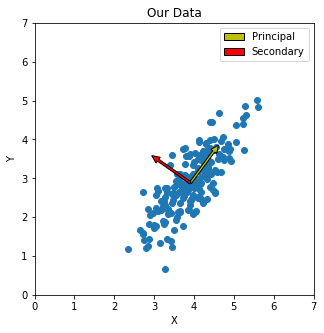

In [5]:
fig = plt.figure(figsize=(5,5))
plt.scatter(data[0,:], data[1,:], label="Data")
plt.xlim(0,7), plt.ylim(0,7)
plt.xlabel('X'),plt.ylabel('Y')
plt.title('Our Data')

#Let's add arrows to represent the principal components. We can center the arrows over the data's centroid (data_mean).
arrow1 = plt.arrow(data_mean[0,0], data_mean[1,0], u1[0,0], u1[1,0], width=0.06, head_width=0.18, head_length=0.2, fc='y', ec='k')
arrow2 = plt.arrow(data_mean[0,0], data_mean[1,0], u2[0,0], u2[1,0], width=0.06, head_width=0.18, head_length=0.2, fc='r', ec='k')
plt.legend([arrow1,arrow2], ['Principal','Secondary'])
plt.show()

#### 3.4 Project the data onto u1, compute the variance and plot

We know that if we project the data onto $\textbf{u}_1$ we get the largest variance, which equals the largest eigenvalue of $\textbf{S}$. 

Let's verify that by computing the variance of the projected data, which can be done in two manners.

In [6]:
#Computing the variance using the data per se
projected_data = [np.dot(u1.T,v) for v in data.T]
projected_data_mean = np.dot(u1.T,data_mean)
projected_data_var = np.mean([(v - projected_data_mean)**2 for v in projected_data])

#Compute the variance using S
projected_data_var_ = (u1.T*S*u1)[0,0]

print("Projected data variance =", projected_data_var)
print("Same variance using S   =", projected_data_var_)
print("As expected, the variance is equal to the largest eigenvalue:", eig_values.max())

Projected data variance = 0.900607694925
Same variance using S   = 0.126355063396
As expected, the variance is equal to the largest eigenvalue: 0.900607694925


 Now let's plot the projected data along the first principal component.

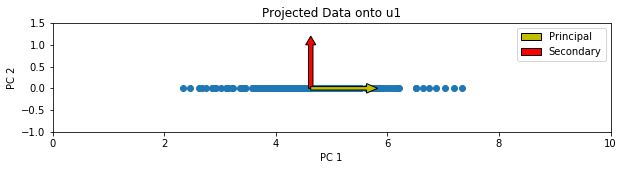

In [7]:
fig = plt.figure(figsize=(10,2))
plt.scatter(projected_data, np.zeros(len(projected_data)), label="Data")
arrow2 = plt.arrow(projected_data_mean, 0, 0, 1, width=0.08, head_width=0.18, head_length=0.2, fc='r', ec='k')
arrow1 = plt.arrow(projected_data_mean, 0, 1, 0, width=0.08, head_width=0.22, head_length=0.2, fc='y', ec='k')
plt.xlim(0,10), plt.ylim(-1,1.5)
plt.xlabel('PC 1'),plt.ylabel('PC 2')
plt.legend([arrow1,arrow2], ['Principal','Secondary'])
plt.title('Projected Data onto u1')
plt.show()

#### 3.4 [Extra] Plot the variance against different  vector directions

As already proved, $\textbf{u}_1$ is the vector which maximizes the variance. For this simple example, we can observe how the variance changes if we project the data along different directions.

Maximum is = 0.9006 for an angle of = 54.1°
Again, we have the same results! u1 has an angle of 54.2°


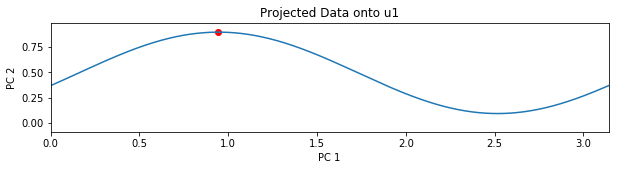

In [8]:
angles = np.arange(0, np.pi, 0.001)          #Let's compute the variance for angles varying from 0° to 180°

var_by_angle = []
for angle in angles:
    u = np.array([np.cos(angle), np.sin(angle)]).reshape(-1,1)
    var_ = u.T.dot(S).dot(u)[0,0]
    var_by_angle.append(var_)

max_var = np.max(var_by_angle)                                #Get the maximum  variance
max_var_angle = angles[np.argmax(var_by_angle)]*180/np.pi     #Get the angle for maximum variance

print("Maximum is = {0:.4f} ".format(max_var), end='')
print("for an angle of = {0:.1f}\u00b0".format(max_var_angle))
print("Again, we have the same results! u1 has an angle of {0:.1f}\u00b0".format(np.arctan2(u1[1,0], u1[0,0])*180/np.pi))

fig = plt.figure(figsize=(10,2))
plt.plot(angles,var_by_angle)
plt.scatter(angles[np.argmax(var_by_angle)], max_var, color='r')
plt.xlim(0,np.pi), plt.ylim(-0.1*max_var, 1.1*max_var)
plt.xlabel('PC 1'),plt.ylabel('PC 2')
plt.title('Projected Data onto u1')
plt.show()

### 4. Minimum-error formulation

Originally, our data has _D_ dimensions, since each sample is described by _D_ coordinates. Despite the original _D_ axes, we can always represent the same data in a different _D-dimensional_ basis, i.e., in a different frame. 

Firstly, we're looking for a specific orthonormal set of D-dimensional basis vectors $\{\textbf{u}_i\}$ on which we can describe our data. They are orthonormal, therefore satisfying $\textbf{u}_i^\texttt{T}\textbf{u}_j = \delta_{ij}$. Also, since this basis is complete, the vectors span the whole _D-dimensional_ space, which means that any vector can be expressed as a linear combination of them: 
$$
\textbf{x}_n = \sum_{i=1}^D \alpha_{ni}\textbf{u}_i, \hspace{1cm} \alpha_{ni} = \textbf{x}_n^\texttt{T}\textbf{u}_i, \hspace{1cm}\textbf{x}_n = \sum_{i=1}^D (\textbf{x}_n^\texttt{T}\textbf{u}_i)\textbf{u}_i,
$$
As shown above, the scalar $\alpha_{ni}$ is the projection of the n-th vector onto the i-th basis vector.

So far, no dimensionaly reduction was done, we simply rotated the data. However, the idea is to try to represent that data using _M_ dimensions (_M < D_), but keeping as much information as possible. If the rotation is done properly, information might end up concentrated along a smaller number of dimensions. To ignore the other _D-M_ dimensions, we can set their coefficients to be the same for all the data.
$$
\textbf{x}_n = \sum_{i=1}^M \alpha_{ni}\textbf{u}_i + \sum_{i=M+1}^D \alpha_{ni}\textbf{u}_i
$$
$$
\tilde{\textbf{x}}_n = \sum_{i=1}^M z_{ni}\textbf{u}_i + \sum_{i=M+1}^D b_i\textbf{u}_i
$$

Note that the second summation on $\tilde{\textbf{x}}_n$ represent all dimensions we are discarding. Now, we define a cost function _J_ to be minimized, as follows:
$$
J = \frac{1}{N}\sum_{n=1}^N \Vert \textbf{x}_n - \tilde{\textbf{x}}_n\Vert^2 $$
$$
J= \frac{1}{N}\sum_{n=1}^N [\textbf{x}_n - \tilde{\textbf{x}}_n]^\texttt{T}[\textbf{x}_n - \tilde{\textbf{x}}_n]
$$

Replacing $\textbf{x}_n$ and $\tilde{\textbf{x}}_n$, and using a property from the transpose of a matrix, we have the following:
$$
J = \frac{1}{N}\sum_{n=1}^N \left[\sum_{i=1}^M (\alpha_{ni}-z_{ni})\textbf{u}_i + \sum_{i=M+1}^D (\alpha_{ni}-b_{i})\textbf{u}_i\right]^\texttt{T}\left[\sum_{i=1}^M (\alpha_{ni}-z_{ni})\textbf{u}_i + \sum_{i=M+1}^D (\alpha_{ni}-b_{i})\textbf{u}_i\right]
$$
$$
J = \frac{1}{N}\sum_{n=1}^N \left[\sum_{i=1}^M (\alpha_{ni}-z_{ni})\textbf{u}_i^\texttt{T} + \sum_{i=M+1}^D (\alpha_{ni}-b_{i})\textbf{u}_i^\texttt{T}\right]\left[\sum_{i=1}^M (\alpha_{ni}-z_{ni})\textbf{u}_i + \sum_{i=M+1}^D (\alpha_{ni}-b_{i})\textbf{u}_i\right]
$$

Now, we can multiply each term, generating four product combinations. 

$$
J = \frac{1}{N}\sum_{n=1}^N \Bigg[\sum_{i=1}^M (\alpha_{ni}-z_{ni})\textbf{u}_i^\texttt{T}\sum_{i=1}^M (\alpha_{ni}-z_{ni})\textbf{u}_i + $$
<font color='red'>$$
\sum_{i=1}^M (\alpha_{ni}-z_{ni})\textbf{u}_i^\texttt{T}\sum_{i=M+1}^D (\alpha_{ni}-b_{i})\textbf{u}_i +  
\sum_{i=M+1}^D (\alpha_{ni}-b_{i})\textbf{u}_i^\texttt{T}\sum_{i=1}^M (\alpha_{ni}-z_{ni})\textbf{u}_i 
$$</font>
$$
+ \sum_{i=M+1}^D (\alpha_{ni}-b_{i})\textbf{u}_i^\texttt{T}\sum_{i=M+1}^D (\alpha_{ni}-b_{i})\textbf{u}_i\Bigg]
$$

The products shown in <font color='red'>**red**</font> equal **zero**, since they include inner products between orthonormal vectors. That can be noticed by looking at the summations indices: while one goes from 1 to M, the other goes from M+1 to D. 

As for each of the other two products, we have the cross-multiplication of two sums, each with $M$ (or $D$) terms. That would generate $M^2$ (or $D^2$) inner products. However, those products are non-zero only when their indices are the same, again due to the orthonormal condition. Considering such simplifcations, and using $\alpha_{ni} = \textbf{x}_n^\texttt{T}\textbf{u}_i$, we have the following:

$$
J = \frac{1}{N}\sum_{n=1}^N \Bigg[\sum_{i=1}^M (\textbf{x}_n^\texttt{T}\textbf{u}_i-z_{ni})^2 + \sum_{i=M+1}^D (\textbf{x}_n^\texttt{T}\textbf{u}_i-b_{i})^2\Bigg]
$$

Now we can minimize $J$ with respect to the quantities $z_{ni}$ and $b_{i}$. Let's consider the first ones to start with, setting its derivative to zero:

$$
\frac{\partial J}{\partial z_{ni}} = \frac{\partial}{\partial z_{ni}}\left[ (\textbf{x}_n^\texttt{T}\textbf{u}_i-z_{ni})^2\right] = -2(\textbf{x}_n^\texttt{T}\textbf{u}_i-z_{ni}) = 0\hspace{0.5cm} \Rightarrow \hspace{0.5cm} z_{ni} = \textbf{x}_n^\texttt{T}\textbf{u}_i
$$

This result shows that, in order the mininize $J$, the coefficients that should be used along with the **dimensions we want to keep** should be their respective original $\alpha$ coefficients, a result that one's intuition could expect. Now, let's consider the $b_{i}$ coefficients, which do not depend on the sample ($n$). 

$$
\frac{\partial J}{\partial b_{i}} = \frac{\partial}{\partial b_{i}}\Bigg[\frac{1}{N}\sum_{n=1}^N  (\textbf{x}_n^\texttt{T}\textbf{u}_i-b_{i})^2\Bigg] = 
\frac{1}{N}\sum_{n=1}^N\frac{\partial}{\partial b_{i}}\Big[  (\textbf{x}_n^\texttt{T}\textbf{u}_i-b_{i})^2\Big] = 
\frac{1}{N}\sum_{n=1}^N-2(\textbf{x}_n^\texttt{T}\textbf{u}_i-b_{i}) =
\frac{1}{N}\sum_{n=1}^N-2(\textbf{x}_n^\texttt{T}\textbf{u}_i-b_{i}) =\\
= \frac{1}{N}\sum_{n=1}^N-2\textbf{x}_n^\texttt{T}\textbf{u}_i + \frac{1}{N}\sum_{n=1}^N2b_{i} =  
-2\left(\frac{1}{N}\sum_{n=1}^N\textbf{x}_n^\texttt{T}\right)\textbf{u}_i + 2b_{i} = -2\overline{\textbf{x}}^\texttt{T}\textbf{u}_i + 2b_{i} = 0 \hspace{0.5cm} \Rightarrow \hspace{0.5cm} b_{i} = \overline{\textbf{x}}^\texttt{T}\textbf{u}_i
$$

This second result shows us that, in order to minimize $J$, the coefficients that should be used along with the **dimensions we want to discard** should be the mean of the data on those dimensions. The unwanted dimensions are then being reduced to their mean.

Let's see what happens to the projection error $\textbf{x}_n - \tilde{\textbf{x}}_n$ when we plug in the results:
$$
\textbf{x}_n - \tilde{\textbf{x}}_n = \sum_{i=1}^M (\alpha_{ni}-\alpha_{ni})\textbf{u}_i + \sum_{i=M+1}^D (\alpha_{ni}-\overline{\textbf{x}}^\texttt{T}\textbf{u}_i)\textbf{u}_i = \sum_{i=M+1}^D (\alpha_{ni}-\overline{\textbf{x}}^\texttt{T}\textbf{u}_i)\textbf{u}_i
$$
$$
\textbf{x}_n - \tilde{\textbf{x}}_n = \sum_{i=M+1}^D \left[(\textbf{x}_n^\texttt{T}-\overline{\textbf{x}}^\texttt{T})\textbf{u}_i\right]\textbf{u}_i
$$
As can be seen, the projection error is a linear combination of the vectors ${\textbf{u}_i}$ relative to the discarded dimensions. Hence, the projection vector (displacement between $\textbf{x}_n$ and $\tilde{\textbf{x}}_n$) belongs to a subspace that is orthogonal to the principal one. 

Now we can replace the results found on the expression for $J$:
$$
J = \frac{1}{N}\sum_{n=1}^N \Bigg[\sum_{i=1}^M (\textbf{x}_n^\texttt{T}\textbf{u}_i-\textbf{x}_n^\texttt{T}\textbf{u}_i)^2 + \sum_{i=M+1}^D (\textbf{x}_n^\texttt{T}\textbf{u}_i-\overline{\textbf{x}}^\texttt{T}\textbf{u}_i)^2\Bigg]\\
J = \frac{1}{N}\sum_{n=1}^N\sum_{i=M+1}^D \{\textbf{x}_n^\texttt{T}\textbf{u}_i-\overline{\textbf{x}}^\texttt{T}\textbf{u}_i\}^2 = 
\sum_{i=M+1}^D\Bigg[\frac{1}{N}\sum_{n=1}^N \{\textbf{x}_n^\texttt{T}\textbf{u}_i-\overline{\textbf{x}}^\texttt{T}\textbf{u}_i\}^2\Bigg] \\
J  = \sum_{i=M+1}^D \textbf{u}_i^\texttt{T}\textbf{S}\textbf{u}_i
$$

At this point, we've got a cost function that is the **dual** of the one we found in the Maximum-variance approach. The difference is that now we're not focusing on the principal subspace, but on the secondary one (where projection errors live in). Because of that, we're looking for the smallest eigenvectors of $\textbf{S}$, which spans the secondary subspace. Finally, the solution is found by choosing $\{\textbf{u}_i\}$ to be the eigenvectors of the matrix in $\textbf{S}\textbf{u}_i = \lambda_i\textbf{u}_i$.

The overall distortion measure will be the sum of the eigenvalues relative to the secondary subspace: $J =  \sum_{i=M+1}^D \lambda_i$

___
### 5. References

[1] Bishop, Christopher M. Pattern recognition and machine learning. springer, 2006.